1. Generate the following figure with correct x label, y label and legends. Make sure to use the letter $\pi$ in the title.
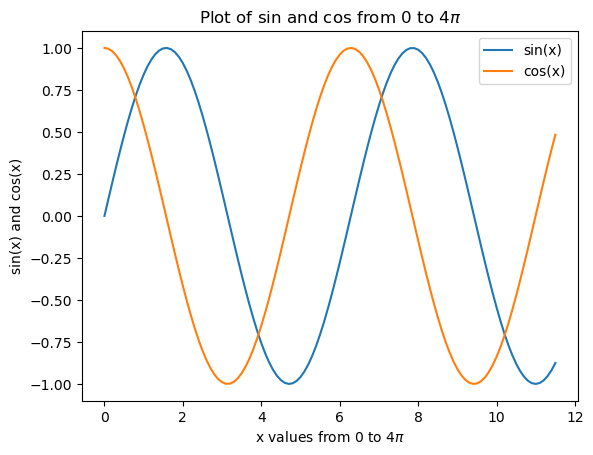

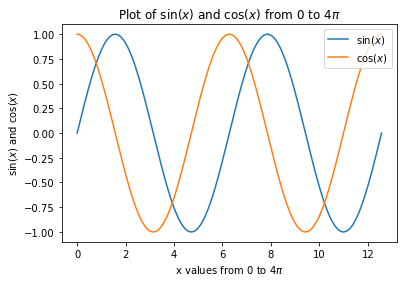

In [149]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,4*np.pi,1000)
y=np.sin(x)
z=np.cos(x)

fig,axes=plt.subplots()
axes.plot(x,y,label='$\sin(x)$')
axes.plot(x,z,label='$\cos(x)$')
axes.set_xlabel('x values from 0 to $4\pi$')
axes.set_ylabel('$\sin(x)$ and $\cos(x)$')
axes.set_title('Plot of $\sin(x)$ and $\cos(x)$ from $0$ to $4\pi$')
axes.legend(loc=1)

2. Plot the results of Python Assignment 3. Numpy, Part Numerical solutions of ODE, problem 1, together with the analytical solution and another numerical solution with step size being 0.05. Add the legend.

Text(0.5, 1.0, "Analytic solution: $x(t)=e^{\\sin(t)}$ vs Euler's Method")

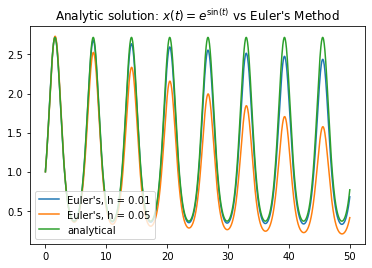

In [158]:
import numpy as np
import matplotlib.pyplot as plt
def f(x,t):
    dxdt=x*np.cos(t)
    return dxdt
t_end=50
fig, ax=plt.subplots()

for h in [0.01,0.05]:
    N=int(t_end/h)
    y=np.zeros([N+1,1])
    t=np.zeros([N+1,1])
    y[0]=1
    for i in range(N):
        y[i+1]=y[i]+f(y[i],t[i])*h
        t[i+1]=t[i]+h
    string="Euler's, h = "+str(h)
    ax.plot(t,y,label=string)
ax.plot(t,np.exp(np.sin(t)),label='analytical')
ax.legend(loc=3)
ax.set_title("Analytic solution: $x(t)=e^{\sin(t)}$ vs Euler's Method")

3. Compute $\int_0^1 x^2+2x dx$ with scipy function quad.

In [154]:
from scipy import integrate

#function
func = lambda x: x**2+2*x

#integral
val = integrate.quad(func,0,1)
print('The value of the integral is ',val[0],'with an error of',val[1])

The value of the integral is  1.3333333333333333 with an error of 1.4802973661668752e-14


4. Plot and find a minima of the function $f(x)=x^4-5x^3+5x^2+5x-6$.

Optimization terminated successfully.
         Current function value: -6.914097
         Iterations: 5
         Function evaluations: 14
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -1.382749
         Iterations: 4
         Function evaluations: 12
         Gradient evaluations: 6


Text(0.5, 1.0, '$f(x)=x^4-5x^3+5x^2+5x-6$ and its minima')

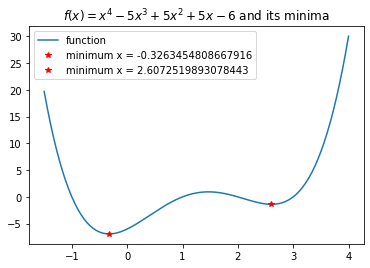

In [87]:
from scipy import optimize

fig,ax=plt.subplots()

x = np.linspace(-1.5,4,200)

f = lambda x : x**4-5*x**3+5*x**2+5*x-6

ax.plot(x,f(x),label='function')

for x0 in [0,3]:
    x_min = optimize.fmin_bfgs(f, x0)
    label_string = 'minimum x = '+str(x_min[0])
    ax.plot(x_min,f(x_min),'r*',label=label_string)
ax.legend()
ax.set_title('$f(x)=x^4-5x^3+5x^2+5x-6$ and its minima')

# Problem 5. Convert the example to SEIR model

The SIR model is deterministic compartment model for the spread of an infectious disease that describes key phenomena encountered in epidemiology. In the SIR model, a population is broken into three non-overlapping groups corresponding to stages of the disease:

* **Susceptible.** The subpopulation susceptible to acquire the disease. For SARS-CoV-2, the assumption is that everyone who has not previously acquired the disease is susceptible to infection.
* **Infectious.** The subpopulation that has become infective.
* **Recovered.** The subpopulation that has recovered from infection, and presumed to be no longer susceiptible to the disease.

Neglecting demographic processes of birth and death from other causes, and assuming a negligible death rate due to infectious disease at issue, the progression of an epidemic can be modeled by rate processesl

$$\text{Susceptible}
\xrightarrow{\frac{\beta S I}{N}} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$

The rate processes are modeled as follows.

* $\frac{\beta S I}{N}$ is the rate at which susecptible population encounters the infected population resulting in trasmission of the disease. $S$ is the size of the susceptible population. $\beta$ is a the model parameters with units of 1/day. 
* $\gamma I$ is the rate at which infected population recovers and becomes resistent to further infection. $I$ is the size of the infective population.

A model for the spread of an infectious disease in a uniform population is given by the deterministic SIR equations

\begin{align*}
\frac{dS}{dt} & = -\frac{\beta S I}{N} \\
\frac{dI}{dt} & = \frac{\beta S I}{N} - \gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align*} 

The model becomes more generic by working with population fractions rather than raw population counts. To this end, define

\begin{align}
s = \frac{S}{N} \qquad
i = \frac{I}{N} \qquad
r = \frac{R}{N}
\end{align} 

After substitution, this results in a system of four equations.

\begin{align*}
\frac{ds}{dt} & = -\beta s i \\
\frac{di}{dt} & = \beta s i - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

where $s + i + r = 1$ is an invariant.

## Key Properties of the SIR Model

The SIR model describes key epidemiological phenemena. Here is a brief synposis of the relevant results.

* The parameters $\beta$ and $\gamma$ have units of inverse time.  
* $\beta$ is rate constant associated with transmission of the infection. The corresponding time constant $\tau_{infect} = \frac{1}{\beta}$ corresponds to exponential growth of new infections in an initially susceptible population where $s=1$. 
* $\gamma$ is the rate of recovery from infections. The associated time constant $\tau_{recovery}=\frac{1}{\gamma}$ is average time to recover from an infection.
* The infectious population can grown only if $\beta s > \gamma$, that is the rate of infection is greater than the rate of recovery.
* The ratio $R_0 = \frac{\beta}{\gamma}$ is the "Basic Reproduction Number" that describes the transmissability or contagiousness of an infectious disease. 
* $R_0$ is the average number of people infected by an index 0 case in an otherwise completely susceptible population. 
* The infectious population can grow only if $R_0 s > 1$. If $s=1$, then $R_0 > 1$ is sufficient for growth of the infectious population.
* The infectious population decreases if $s R_0 < 1$ or, equivalently, $s < \frac{1}{R_0}$.
* The population has 'herd immunity' when the fraction of susceptibles is less than $\frac{1}{R_0}$.

## Simulation

The following Python code implements a simulation of the SIR model. The parameter values were selected from the recent survey by Boldog, et al. (2020).

* $\tau_{infectious} = \frac{1}{\gamma} = 8.4$ days.
* $R_0 = \frac{\beta}{\gamma} = 2.4$ 

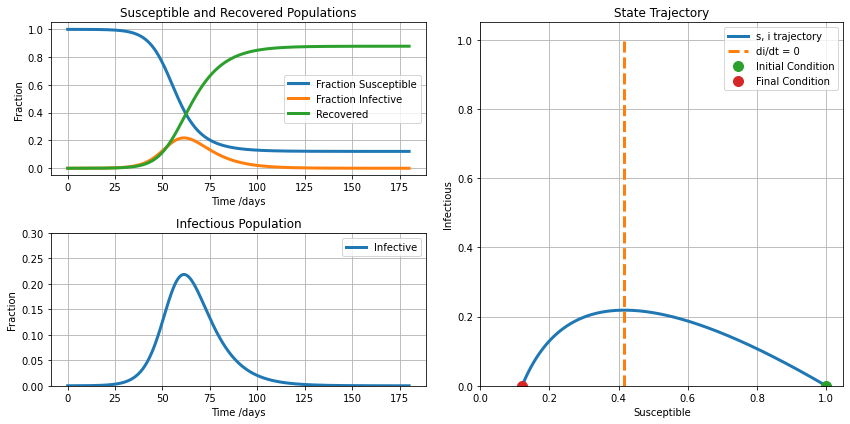

In [70]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
R0 = 2.4
t_infective = 5.1 + 3.3

# initial number of infected and recovered individuals
i_initial = 1/20000
r_initial = 0.00
s_initial = 1 - i_initial - r_initial

gamma = 1/t_infective
beta = R0*gamma

# SIR model differential equations.
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]

t = np.linspace(0, 180, 2000)
x_initial = s_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(beta, gamma))
s, i, r = soln.T
e = None


# plot the data
fig = plt.figure(figsize=(12,6))
ax = [fig.add_subplot(221, axisbelow=True), 
      fig.add_subplot(223),
      fig.add_subplot(122)]

ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
ax[0].plot(t, i, lw=3, label='Fraction Infective')
ax[0].plot(t, r, lw=3, label='Recovered')
ax[0].set_title('Susceptible and Recovered Populations')
ax[0].set_xlabel('Time /days')
ax[0].set_ylabel('Fraction')

ax[1].plot(t, i, lw=3, label='Infective')
ax[1].set_title('Infectious Population')
if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
ax[1].set_ylim(0, 0.3)
ax[1].set_xlabel('Time /days')
ax[1].set_ylabel('Fraction')

ax[2].plot(s, i, lw=3, label='s, i trajectory')
ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
ax[2].set_title('State Trajectory')
ax[2].set_aspect('equal')
ax[2].set_ylim(0, 1.05)
ax[2].set_xlim(0, 1.05)
ax[2].set_xlabel('Susceptible')
ax[2].set_ylabel('Infectious')

for a in ax: 
    a.grid(True)
    a.legend()

plt.tight_layout()



The SEIR model extends the SIR model by adding an additional population compartment containing those individuals who have been exposed to the virus but not yet infective.

* **Exposed.** The subpopulation that has been exposed to the disease but not yet infective. 

The compartment model can be diagrammed as follows.

$$\text{Susceptible}
\xrightarrow{\frac{\beta S I}{N}} 
\text{Exposed} 
\xrightarrow{\alpha E} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$

The rate processes are modeled as follows.

* $\frac{\beta S I}{N}$ is the rate at which susecptible population encounters the infected population resulting in trasmission of the disease. $S$ is the size of the susceptible population. $\beta$ is a the model parameters with units of 1/day. 
* $\alpha E$ is the rate at which exposed population becomes infective, where $E$ is the size of the exposed population. The average period of time in the exposed state is the incubation period of the disease, and equal to $\frac{1}{\alpha}$.
* $\gamma I$ is the rate at which infected population recovers and becomes resistent to further infection. $I$ is the size of the infective population.

An elementary model for the spread of an infectious disease in a uniform population is given by the deterministic SEIR equations}

After substitution, this results in a system of four equations.

\begin{align*}
\frac{ds}{dt} & = -\beta s i \\
\frac{de}{dt} & = \beta s i - \alpha e \\
\frac{di}{dt} & = \alpha e  - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

where $s + e + i + r = 1$ is an invariant.

Reproduce the two figures in the left panel using the SEIR model and the following parameters.

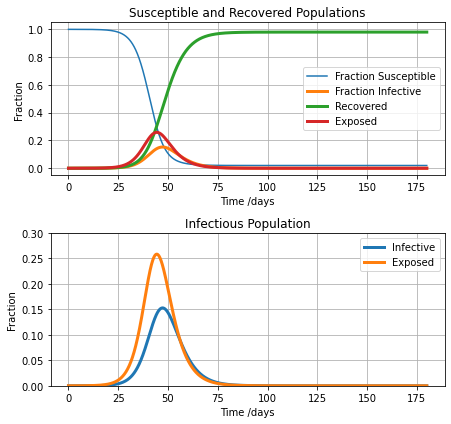

In [155]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# parameter values
R0 = 4
t_incubation = 5.1
t_infective = 3.3

# initial number of infected and recovered individuals
e_initial = 1/20000
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

def deriv(x, t, beta, gamma, alpha):
    s, e, i, r = x
    dsdt = -beta * s * i
    dedt = beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 180, 2000)
x_initial = s_initial, e_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(beta, gamma, alpha))
s, e, i, r = soln.T

#Plot the results
fig = plt.figure(figsize=(12,6))
ax = [fig.add_subplot(221, axisbelow=True), 
      fig.add_subplot(223)]
      #fig.add_subplot(122)]

ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
ax[0].plot(t, i, lw=3, label='Fraction Infective')
ax[0].plot(t, r, lw=3, label='Recovered')
ax[0].plot(t, e, lw=3, label='Exposed')
ax[0].set_title('Susceptible and Recovered Populations')
ax[0].set_xlabel('Time /days')
ax[0].set_ylabel('Fraction')

ax[1].plot(t, i, lw=3, label='Infective')
ax[1].set_title('Infectious Population')
if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
ax[1].set_ylim(0, 0.3)
ax[1].set_xlabel('Time /days')
ax[1].set_ylabel('Fraction')

"""
ax[2].plot(s, i, lw=3, label='s, i trajectory')
ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
ax[2].set_title('State Trajectory')
ax[2].set_aspect('equal')
ax[2].set_ylim(0, 1.05)
ax[2].set_xlim(0, 1.05)
ax[2].set_xlabel('Susceptible')
ax[2].set_ylabel('Infectious')
"""

for a in ax: 
    a.grid(True)
    a.legend()

plt.tight_layout()